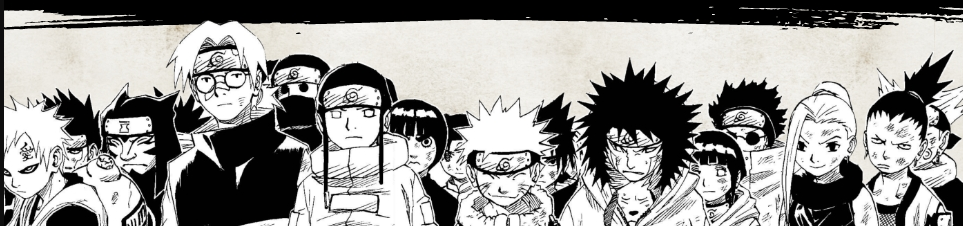

---

# DOJO: EXAME CHUNIN CIÊNCIA DE DADOS COM PYTHON

---

### 📋 Objetivo:
Neste exercício, o objetivo é **explorar e analisar dados** textuais de citações e personagens de animes, utilizando técnicas de **preparação de dados** e **visualização** para conduzir análises e, eventualmente, preparar os dados para tarefas de **NLP (Processamento de Linguagem Natural)**.

- Leitura e análise de dados.
- Limpeza e preparação de texto.
- Visualização dos dados.

### 🎮 Como a equipe será organizada:
- **Piloto**: No inicio da sessão, um membro da equipe é designado como piloto. Ele será responsavel pela codificação durante 10 minutos.
- **Instrutor**:Outro membro da equipe é designado com Instrutor. Ele não codifica diretamente, mas fornece instruções verbais ao **Piloto**.
- **Equipe de Suporte**: Os demais membros ajudam com sugestões e esclarecimento de dúvidas para ajudar o **Instrutor**s.

---

# Atividades

---

### Carregamento e Inspeção Inicial
Realize a **importação dos dados** e a verificação básica da estrutura dos DataFrames. O objetivo é garantir que os arquivos foram carregados corretamente e identificar possíveis problemas.

- Carregue os datasets
- Verifique as 5 primeiras linhas de cada dataset
- Verifique o número de linhas e colunas de cada DataFrame
- Visualize a estrutura básica do DataFrame

### Limpeza de Dados
Identifique e tratamos valores ausentes, duplicatas e colunas irrelevantes. 

- Mostre a soma de dados nulos para cada coluna
- Remova todas Colunas com dados nulos. E também remova o “ID’ se tiver.
- Remova linhas com valores nulos
- Salve segundo dataframe já limpo em um novo terceiro dataframe.

### Conversão de Tipos de Dados e Merging
Para garantir que os dados estão no formato correto, convertemos as colunas para o tipo string, facilitando o pré-processamento textual nas etapas seguintes. 

- Converta as colunas relevantes dos datasets 'Quote', 'Anime' e 'Character' para o tipo string.
- Garantir que os textos nas colunas 'Quote', 'Character' e 'Anime' estejam todos em letras minúsculas para uniformizar os dados e facilitar a análise.
- Remova o “ID’ e Salve um novo dataframe.
- Combinar dois dataframes, use a função **concat** do Pandas: e faça o merge do primeiro dataframe e o quarto dataframe.
- Remova linhas com valores nulos se tiver.
- Padronize os valores de texto nas colunas "Anime", "Character" e "Quote" convertendo para letras minúsculas para garantir a consistência nos dados.

---

## Visualizações para Preparação de NLP
- Gera um **gráfico de barras** mostrando as 20 palavras mais frequentes nas citações (Quote). Isso ajuda a identificar palavras comuns ou irrelevantes (como stopwords) que podem ser removidas no pré-processamento de NLP. Dica "from collections import Counter"
- Crie **histograma** mostrando a distribuição do comprimento das citações (número de palavras). Isso pode ajudar a decidir se as citações são longas o suficiente para o processamento de NLP ou se há outliers que precisam ser tratados. Uma dica, para gerar o histograma crie coluna contendo a quantidade de palavras da coluna "Quote".
- Gere uma **WordCloud** da coluna "Quote" para visualizar as palavras mais frequentes nas citações. Esta visualização é útil para identificar visualmente padrões textuais. Dica "from wordcloud import WordCloud"
- Gera um **gráfico de barras** do "Quote" para mostrar a média de palavras por citação de cada personagem. Isso ajuda a entender se certos personagens tendem a usar citações mais longas ou mais curtas.

## Interpretações
- Quais palavras aparecem com mais frequência nas citações? Fale sobre as 10 mais frequentes, tem correlação com os animes? Quais?
- o que é um stopwords? Faria diferença elimina-las, impacta de alguma forma nas análises?
- As citações variam muito em tamanho? Existem outliers (muito curtas ou muito longas) que precisam ser tratados?

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud
import re

In [3]:
    df1 = pd.read_csv('./notebooks/DojoDataset01.csv')
df2 = pd.read_csv('./notebooks/DojoDataset02.csv', sep=';')
df1.head()

,Quote,Character,Anime
0,"People’s lives don’t end when they die, it end...",Itachi Uchiha,Naruto
1,"If you don’t take risks, you can’t create a fu...",Monkey D Luffy,One Piece
2,"If you don’t like your destiny, don’t accept it.",Naruto Uzumaki,Naruto
3,"When you give up, that’s when the game ends.",Mitsuyoshi Anzai,Slam Dunk
4,All we can do is live until the day we die. Co...,Deneil Young,Uchuu Kyoudai or Space Brothers


In [4]:
df2.head()

,ID,Anime,Character,Quote,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,0,(Soul Eater),Soul Eater,In the end the shape and form don't matter at ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,(ReLIFE),Ooga Kazuomi,"I'm still a man too, I wanted to look calm and...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,(Psycho-Pass Extended Edition),Makishima Shougo,"Clausewitz, he pointed out that no matter how ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,(Naruto),Pain,Because of the existence of love - sacrifice i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,(Detective Conan),Ran Mouri,Courage is a word of justice. It means the qua...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Quote      121 non-null    object
 1   Character  121 non-null    object
 2   Anime      120 non-null    object
dtypes: object(3)
memory usage: 3.0+ KB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           8494 non-null   object
 1   Anime        8436 non-null   object
 2   Character    8366 non-null   object
 3   Quote        8356 non-null   object
 4   Unnamed: 4   2 non-null      object
 5   Unnamed: 5   1 non-null      object
 6   Unnamed: 6   1 non-null      object
 7   Unnamed: 7   1 non-null      object
 8   Unnamed: 8   1 non-null      object
 9   Unnamed: 9   1 non-null      object
 10  Unnamed: 10  1 non-null      object
 11  Unnamed: 11  1 non-null      object
dtypes: object(12)
memory usage: 821.4+ KB


In [7]:
df1.describe()

,Quote,Character,Anime
count,121,121,120
unique,118,94,63
top,Every journey begins with a single step. We ju...,Monkey D Luffy,Attack on Titan
freq,2,4,12


In [8]:
df2.describe()

,ID,Anime,Character,Quote,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
count,8494,8436,8366,8356,2,1,1,1,1,1,1,1
unique,8490,848,2334,8348,2,1,1,1,1,1,1,1
top,"""",(Naruto),Hachiman Hikigaya,"Bitter crimson tears flow from lifeless eyes, ...","there's no other way but to work.""",fight,are injured,feel joy,sadness,hate someone,love someone. All in just a moment. And then,are embraced by the eternal sleep called death.
freq,3,504,96,2,1,1,1,1,1,1,1,1


In [9]:
df1.isnull().sum()

Quote        0
Character    0
Anime        1
dtype: int64

In [10]:
df2.isnull().sum()

ID              266
Anime           324
Character       394
Quote           404
Unnamed: 4     8758
Unnamed: 5     8759
Unnamed: 6     8759
Unnamed: 7     8759
Unnamed: 8     8759
Unnamed: 9     8759
Unnamed: 10    8759
Unnamed: 11    8759
dtype: int64

In [11]:
df2 = df2.drop(columns=['ID', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'])
df2

,Anime,Character,Quote
0,(Soul Eater),Soul Eater,In the end the shape and form don't matter at ...
1,(ReLIFE),Ooga Kazuomi,"I'm still a man too, I wanted to look calm and..."
2,(Psycho-Pass Extended Edition),Makishima Shougo,"Clausewitz, he pointed out that no matter how ..."
3,(Naruto),Pain,Because of the existence of love - sacrifice i...
4,(Detective Conan),Ran Mouri,Courage is a word of justice. It means the qua...
...,...,...,...
8755,(Mobile Suit Gundam Seed),Lacus Clyne,Is it weapons that are the cause of all this f...
8756,(Mobile Suit Gundam Seed),Kira Yamato,"What can you protect, if your only weapon are ..."
8757,(Code Geass: Lelouch of the Rebellion),C.C.,Do you know why snow is white..? Because it fo...
8758,(Tengen Toppa Gurren Lagann),Kamina,Don't believe in yourself. Believe in ME who b...


In [12]:
df2.isnull().sum()

Anime        324
Character    394
Quote        404
dtype: int64

In [13]:
df3 = df2.dropna(axis=0)

In [14]:
df3

,Anime,Character,Quote
0,(Soul Eater),Soul Eater,In the end the shape and form don't matter at ...
1,(ReLIFE),Ooga Kazuomi,"I'm still a man too, I wanted to look calm and..."
2,(Psycho-Pass Extended Edition),Makishima Shougo,"Clausewitz, he pointed out that no matter how ..."
3,(Naruto),Pain,Because of the existence of love - sacrifice i...
4,(Detective Conan),Ran Mouri,Courage is a word of justice. It means the qua...
...,...,...,...
8755,(Mobile Suit Gundam Seed),Lacus Clyne,Is it weapons that are the cause of all this f...
8756,(Mobile Suit Gundam Seed),Kira Yamato,"What can you protect, if your only weapon are ..."
8757,(Code Geass: Lelouch of the Rebellion),C.C.,Do you know why snow is white..? Because it fo...
8758,(Tengen Toppa Gurren Lagann),Kamina,Don't believe in yourself. Believe in ME who b...


In [15]:
df3.to_csv('dojo_df3.csv')

In [16]:
df3 = df3.astype(str)

In [17]:
df3

,Anime,Character,Quote
0,(Soul Eater),Soul Eater,In the end the shape and form don't matter at ...
1,(ReLIFE),Ooga Kazuomi,"I'm still a man too, I wanted to look calm and..."
2,(Psycho-Pass Extended Edition),Makishima Shougo,"Clausewitz, he pointed out that no matter how ..."
3,(Naruto),Pain,Because of the existence of love - sacrifice i...
4,(Detective Conan),Ran Mouri,Courage is a word of justice. It means the qua...
...,...,...,...
8755,(Mobile Suit Gundam Seed),Lacus Clyne,Is it weapons that are the cause of all this f...
8756,(Mobile Suit Gundam Seed),Kira Yamato,"What can you protect, if your only weapon are ..."
8757,(Code Geass: Lelouch of the Rebellion),C.C.,Do you know why snow is white..? Because it fo...
8758,(Tengen Toppa Gurren Lagann),Kamina,Don't believe in yourself. Believe in ME who b...


In [18]:
df3['Quote'] = df3['Quote'].str.lower()

In [19]:
df3['Quote']

0       in the end the shape and form don't matter at ...
1       i'm still a man too, i wanted to look calm and...
2       clausewitz, he pointed out that no matter how ...
3       because of the existence of love - sacrifice i...
4       courage is a word of justice. it means the qua...
                              ...                        
8755    is it weapons that are the cause of all this f...
8756    what can you protect, if your only weapon are ...
8757    do you know why snow is white..? because it fo...
8758    don't believe in yourself. believe in me who b...
8759                    i'm not a nerd, i'm a specialist.
Name: Quote, Length: 8356, dtype: object

In [20]:
df3['Anime'] = df3['Anime'].str.lower()
df3['Anime']

0                                 (soul eater)
1                                     (relife)
2               (psycho-pass extended edition)
3                                     (naruto)
4                            (detective conan)
                         ...                  
8755                 (mobile suit gundam seed)
8756                 (mobile suit gundam seed)
8757    (code geass: lelouch of the rebellion)
8758              (tengen toppa gurren lagann)
8759                       (full metal panic!)
Name: Anime, Length: 8356, dtype: object

In [21]:
df3['Character'] = df3['Character'].str.lower()
df3['Character']

0             soul eater
1           ooga kazuomi
2       makishima shougo
3                   pain
4              ran mouri
              ...       
8755         lacus clyne
8756         kira yamato
8757                c.c.
8758              kamina
8759      sousuke sagara
Name: Character, Length: 8356, dtype: object

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8356 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Anime      8356 non-null   object
 1   Character  8356 non-null   object
 2   Quote      8356 non-null   object
dtypes: object(3)
memory usage: 261.1+ KB


In [23]:
df4 = pd.concat([df1, df3], ignore_index=True)

In [24]:
df4

,Quote,Character,Anime
0,"People’s lives don’t end when they die, it end...",Itachi Uchiha,Naruto
1,"If you don’t take risks, you can’t create a fu...",Monkey D Luffy,One Piece
2,"If you don’t like your destiny, don’t accept it.",Naruto Uzumaki,Naruto
3,"When you give up, that’s when the game ends.",Mitsuyoshi Anzai,Slam Dunk
4,All we can do is live until the day we die. Co...,Deneil Young,Uchuu Kyoudai or Space Brothers
...,...,...,...
8472,is it weapons that are the cause of all this f...,lacus clyne,(mobile suit gundam seed)
8473,"what can you protect, if your only weapon are ...",kira yamato,(mobile suit gundam seed)
8474,do you know why snow is white..? because it fo...,c.c.,(code geass: lelouch of the rebellion)
8475,don't believe in yourself. believe in me who b...,kamina,(tengen toppa gurren lagann)


In [25]:
df4.isna().sum()

Quote        0
Character    0
Anime        1
dtype: int64

In [26]:
df4['Quote'] = df4['Quote'].str.lower()
df4

,Quote,Character,Anime
0,"people’s lives don’t end when they die, it end...",Itachi Uchiha,Naruto
1,"if you don’t take risks, you can’t create a fu...",Monkey D Luffy,One Piece
2,"if you don’t like your destiny, don’t accept it.",Naruto Uzumaki,Naruto
3,"when you give up, that’s when the game ends.",Mitsuyoshi Anzai,Slam Dunk
4,all we can do is live until the day we die. co...,Deneil Young,Uchuu Kyoudai or Space Brothers
...,...,...,...
8472,is it weapons that are the cause of all this f...,lacus clyne,(mobile suit gundam seed)
8473,"what can you protect, if your only weapon are ...",kira yamato,(mobile suit gundam seed)
8474,do you know why snow is white..? because it fo...,c.c.,(code geass: lelouch of the rebellion)
8475,don't believe in yourself. believe in me who b...,kamina,(tengen toppa gurren lagann)


In [27]:
df4['Character'] = df4['Character'].str.lower()
df4

,Quote,Character,Anime
0,"people’s lives don’t end when they die, it end...",itachi uchiha,Naruto
1,"if you don’t take risks, you can’t create a fu...",monkey d luffy,One Piece
2,"if you don’t like your destiny, don’t accept it.",naruto uzumaki,Naruto
3,"when you give up, that’s when the game ends.",mitsuyoshi anzai,Slam Dunk
4,all we can do is live until the day we die. co...,deneil young,Uchuu Kyoudai or Space Brothers
...,...,...,...
8472,is it weapons that are the cause of all this f...,lacus clyne,(mobile suit gundam seed)
8473,"what can you protect, if your only weapon are ...",kira yamato,(mobile suit gundam seed)
8474,do you know why snow is white..? because it fo...,c.c.,(code geass: lelouch of the rebellion)
8475,don't believe in yourself. believe in me who b...,kamina,(tengen toppa gurren lagann)


In [28]:
df4['Anime'] = df4['Anime'].str.lower()
df4

,Quote,Character,Anime
0,"people’s lives don’t end when they die, it end...",itachi uchiha,naruto
1,"if you don’t take risks, you can’t create a fu...",monkey d luffy,one piece
2,"if you don’t like your destiny, don’t accept it.",naruto uzumaki,naruto
3,"when you give up, that’s when the game ends.",mitsuyoshi anzai,slam dunk
4,all we can do is live until the day we die. co...,deneil young,uchuu kyoudai or space brothers
...,...,...,...
8472,is it weapons that are the cause of all this f...,lacus clyne,(mobile suit gundam seed)
8473,"what can you protect, if your only weapon are ...",kira yamato,(mobile suit gundam seed)
8474,do you know why snow is white..? because it fo...,c.c.,(code geass: lelouch of the rebellion)
8475,don't believe in yourself. believe in me who b...,kamina,(tengen toppa gurren lagann)


In [29]:
df4.isnull().sum()

Quote        0
Character    0
Anime        1
dtype: int64

In [30]:
df4 = df4.dropna()

In [31]:
df4.isnull().sum()

Quote        0
Character    0
Anime        0
dtype: int64

In [32]:
df4['Quote'].str.split(' ')

0       [people’s, lives, don’t, end, when, they, die,...
1       [if, you, don’t, take, risks,, you, can’t, cre...
2       [if, you, don’t, like, your, destiny,, don’t, ...
3       [when, you, give, up,, that’s, when, the, game...
4       [all, we, can, do, is, live, until, the, day, ...
                              ...                        
8472    [is, it, weapons, that, are, the, cause, of, a...
8473    [what, can, you, protect,, if, your, only, wea...
8474    [do, you, know, why, snow, is, white..?, becau...
8475    [don't, believe, in, yourself., believe, in, m...
8476            [i'm, not, a, nerd,, i'm, a, specialist.]
Name: Quote, Length: 8476, dtype: object

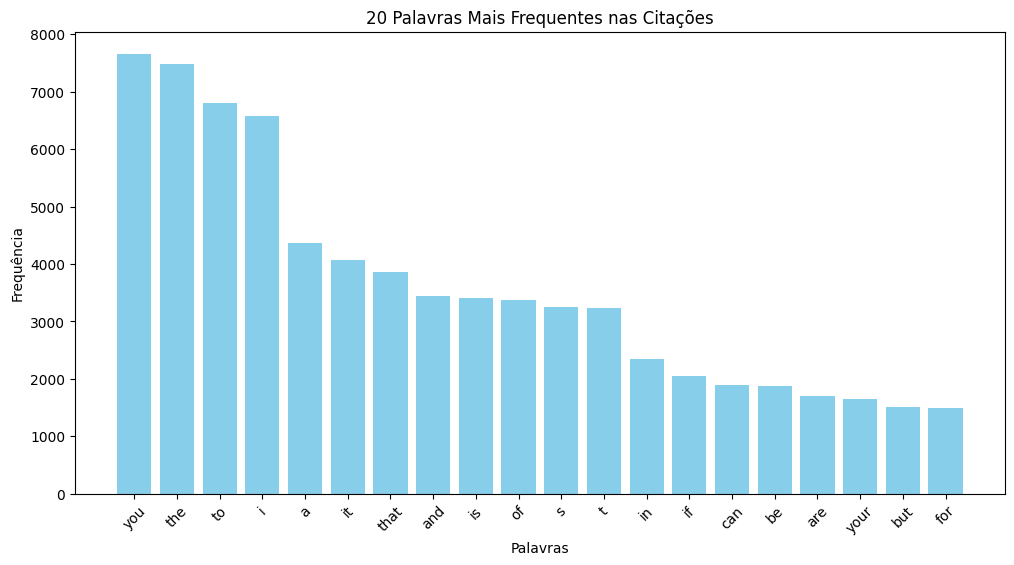

In [34]:
text = " ".join(quote for quote in df2['Quote'].astype(str))
words = re.findall(r'\w+', text.lower())
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)
words, counts = zip(*most_common_words)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.title('20 Palavras Mais Frequentes nas Citações')
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.show()

/var/folders/8z/wwh534x15014jcqbj4y8gm7h0000gq/T/ipykernel_1683/2495577525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['word_count'] = df4['Quote'].apply(lambda x: len(x.split()))


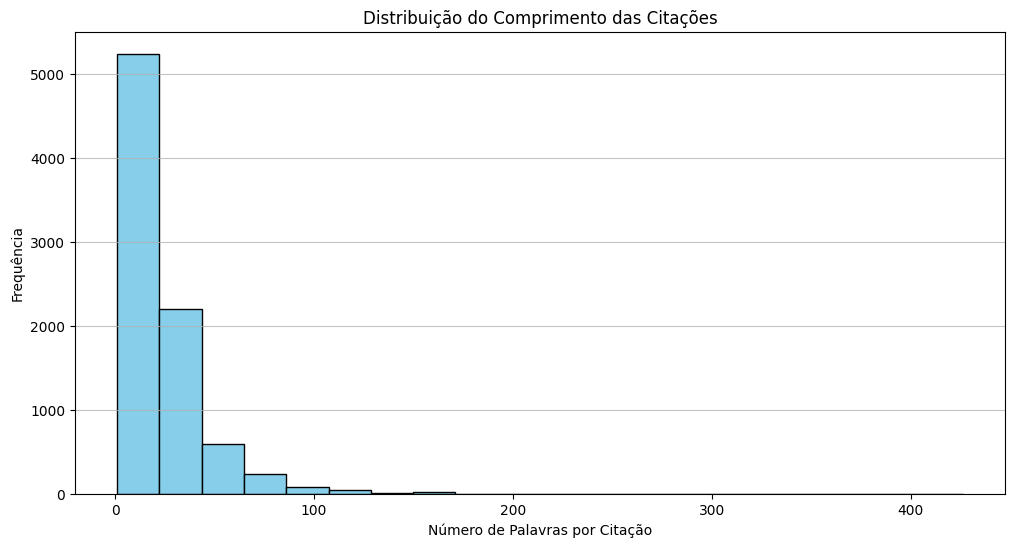

In [36]:
df4['word_count'] = df4['Quote'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
plt.hist(df4['word_count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição do Comprimento das Citações')
plt.xlabel('Número de Palavras por Citação')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)  # Adiciona uma grade ao histograma
plt.show()

/var/folders/8z/wwh534x15014jcqbj4y8gm7h0000gq/T/ipykernel_1683/1478650499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['word_count'] = df4['Quote'].apply(lambda x: len(x.split()))
/opt/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


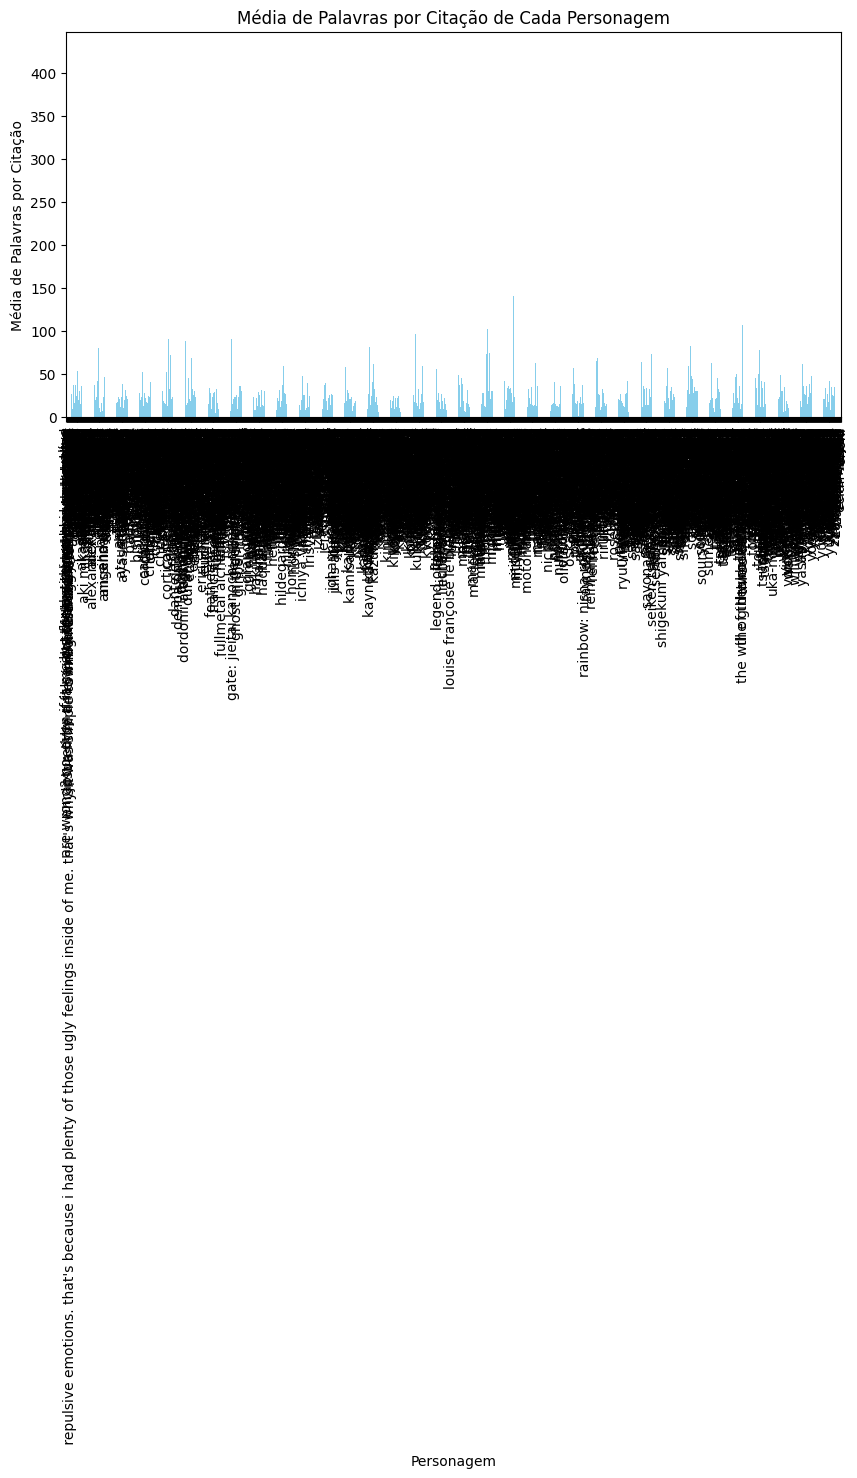

In [38]:
df4['word_count'] = df4['Quote'].apply(lambda x: len(x.split()))

mean_word_count = df4.groupby('Character')['word_count'].mean()

 
mean_word_count.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Média de Palavras por Citação de Cada Personagem')
plt.xlabel('Personagem')
plt.ylabel('Média de Palavras por Citação')
plt.show()